In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataF = yf.download("EURUSD=X", start="2023-2-6", end="2023-4-5", interval='15m')
dataF.iloc[:,:]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-02-06 00:00:00,1.079214,1.079680,1.078981,1.078981,1.078981,0
2023-02-06 00:15:00,1.079214,1.079331,1.078865,1.078865,1.078865,0
2023-02-06 00:30:00,1.078865,1.079214,1.078516,1.078865,1.078865,0
2023-02-06 00:45:00,1.078749,1.079098,1.078632,1.079098,1.079098,0
2023-02-06 01:00:00,1.079447,1.079797,1.078981,1.079447,1.079447,0
...,...,...,...,...,...,...
2023-04-04 22:45:00,1.095890,1.096131,1.095770,1.095890,1.095890,0
2023-04-04 23:00:00,1.095890,1.096131,1.095770,1.096011,1.096011,0
2023-04-04 23:15:00,1.095770,1.096251,1.095650,1.095890,1.095890,0


<Axes: xlabel='Datetime'>

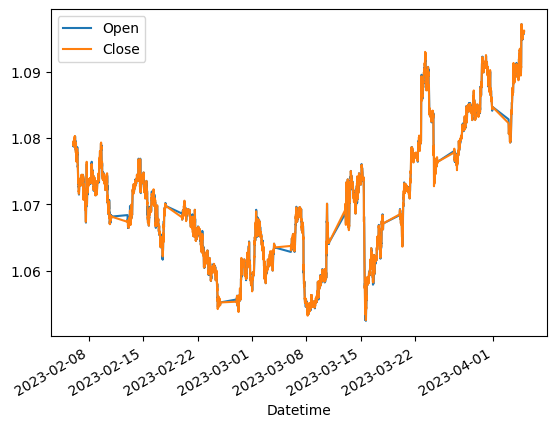

In [ ]:
compare = dataF[['Open', 'Close']]
compare.plot()

(<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>)

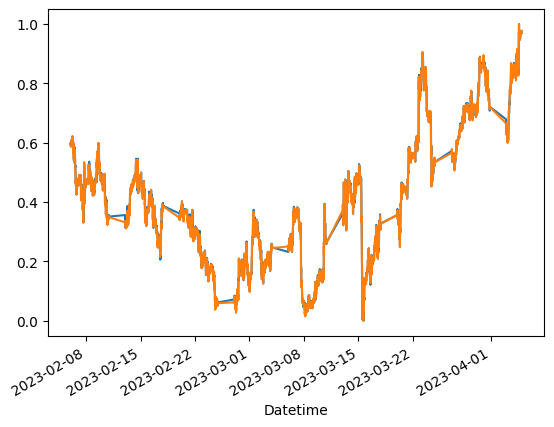

In [ ]:
open = dataF['Open']
x_norm = (open-np.min(open))/(np.max(open)-np.min(open))
close = dataF['Close']
x1_norm = (close-np.min(close))/(np.max(close)-np.min(close))
x_norm.plot(), x1_norm.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X1, y1 = df_to_X_y(df=x_norm)
X1.shape, y1.shape

((3972, 5, 1), (3972,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3177, 5, 1), (795, 5, 1), (3177,), (795,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_19 (Dense)            (None, 8)                 520       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[RootMeanSquaredError()])

In [ ]:
history = model1.fit(X_train, y_train, epochs=20, callbacks=[cp1])

Epoch 1/20
 96/100 [===========================>..] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1501

100/100 [==============================] - 3s 6ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477
Epoch 2/20
 95/100 [===========================>..] - ETA: 0s - loss: 4.6700e-04 - root_mean_squared_error: 0.0216

100/100 [==============================] - 1s 6ms/step - loss: 4.6257e-04 - root_mean_squared_error: 0.0215
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 4.0852e-04 - root_mean_squared_error: 0.0202

100/100 [==============================] - 1s 7ms/step - loss: 4.0852e-04 - root_mean_squared_error: 0.0202
Epoch 4/20
 95/100 [===========================>..] - ETA: 0s - loss: 4.0443e-04 - root_mean_squared_error: 0.0201

100/100 [==============================] - 1s 9ms/step - loss: 3.9820e-04 - root_mean_squared_error: 0.0200
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 3.9625e-04 - root_mean_squared_error: 0.0199

100/100 [==============================] - 1s 9ms/step - loss: 3.9625e-04 - root_mean_squared_error: 0.0199
Epoch 6/20
 97/100 [============================>.] - ETA: 0s - loss: 3.8326e-04 - root_mean_squared_error: 0.0196

100/100 [==============================] - 1s 10ms/step - loss: 3.9523e-04 - root_mean_squared_error: 0.0199
Epoch 7/20
 97/100 [============================>.] - ETA: 0s - loss: 4.1060e-04 - root_mean_squared_error: 0.0203

100/100 [==============================] - 1s 7ms/step - loss: 4.1121e-04 - root_mean_squared_error: 0.0203
Epoch 8/20
 93/100 [==========================>...] - ETA: 0s - loss: 3.9066e-04 - root_mean_squared_error: 0.0198

100/100 [==============================] - 1s 6ms/step - loss: 3.9141e-04 - root_mean_squared_error: 0.0198
Epoch 9/20
 95/100 [===========================>..] - ETA: 0s - loss: 3.8479e-04 - root_mean_squared_error: 0.0196

100/100 [==============================] - 1s 7ms/step - loss: 3.8516e-04 - root_mean_squared_error: 0.0196
Epoch 10/20
 98/100 [============================>.] - ETA: 0s - loss: 3.8207e-04 - root_mean_squared_error: 0.0195

100/100 [==============================] - 1s 6ms/step - loss: 3.8166e-04 - root_mean_squared_error: 0.0195
Epoch 11/20
 96/100 [===========================>..] - ETA: 0s - loss: 3.7417e-04 - root_mean_squared_error: 0.0193

100/100 [==============================] - 1s 6ms/step - loss: 3.7735e-04 - root_mean_squared_error: 0.0194
Epoch 12/20
 94/100 [===========================>..] - ETA: 0s - loss: 3.6850e-04 - root_mean_squared_error: 0.0192

100/100 [==============================] - 1s 6ms/step - loss: 3.6956e-04 - root_mean_squared_error: 0.0192
Epoch 13/20
 95/100 [===========================>..] - ETA: 0s - loss: 3.6113e-04 - root_mean_squared_error: 0.0190

100/100 [==============================] - 1s 6ms/step - loss: 3.6624e-04 - root_mean_squared_error: 0.0191
Epoch 14/20
 94/100 [===========================>..] - ETA: 0s - loss: 3.7436e-04 - root_mean_squared_error: 0.0193

100/100 [==============================] - 1s 6ms/step - loss: 3.7265e-04 - root_mean_squared_error: 0.0193
Epoch 15/20
 93/100 [==========================>...] - ETA: 0s - loss: 3.6904e-04 - root_mean_squared_error: 0.0192

100/100 [==============================] - 1s 6ms/step - loss: 3.7195e-04 - root_mean_squared_error: 0.0193
Epoch 16/20
 95/100 [===========================>..] - ETA: 0s - loss: 3.5911e-04 - root_mean_squared_error: 0.0190

100/100 [==============================] - 1s 6ms/step - loss: 3.6480e-04 - root_mean_squared_error: 0.0191
Epoch 17/20
 97/100 [============================>.] - ETA: 0s - loss: 3.7870e-04 - root_mean_squared_error: 0.0195

100/100 [==============================] - 1s 6ms/step - loss: 3.7881e-04 - root_mean_squared_error: 0.0195
Epoch 18/20
 96/100 [===========================>..] - ETA: 0s - loss: 3.4351e-04 - root_mean_squared_error: 0.0185

100/100 [==============================] - 1s 6ms/step - loss: 3.4063e-04 - root_mean_squared_error: 0.0185
Epoch 19/20
 93/100 [==========================>...] - ETA: 0s - loss: 3.3202e-04 - root_mean_squared_error: 0.0182

100/100 [==============================] - 1s 6ms/step - loss: 3.3004e-04 - root_mean_squared_error: 0.0182
Epoch 20/20
 96/100 [===========================>..] - ETA: 0s - loss: 3.3170e-04 - root_mean_squared_error: 0.0182

100/100 [==============================] - 1s 6ms/step - loss: 3.3018e-04 - root_mean_squared_error: 0.0182


In [ ]:
pd.DataFrame(history.history)

,loss,root_mean_squared_error
0,0.021808,0.147674
1,0.000463,0.021507
2,0.000409,0.020212
3,0.000398,0.019955
4,0.000396,0.019906
5,0.000395,0.019880
6,0.000411,0.020278
7,0.000391,0.019784
8,0.000385,0.019626
9,0.000382,0.019536


Text(0.5, 1.0, 'Model 1 training curves')

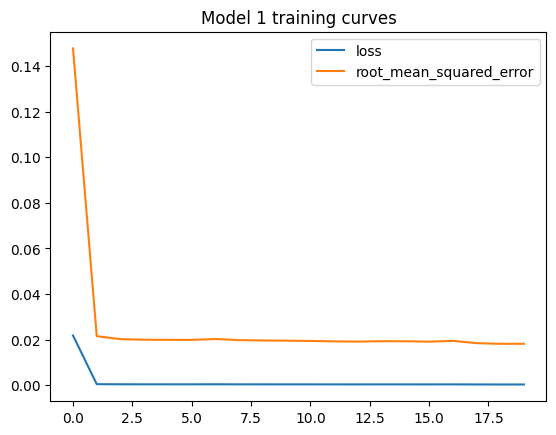

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 training curves")

In [ ]:
train_predictions = model1.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
train_results


25/25 [==============================] - 0s 6ms/step


,Train Predictions,Actuals
0,0.266926,0.239744
1,0.340667,0.341083
2,0.155239,0.144260
3,0.365936,0.369106
4,0.333216,0.315668
...,...,...
790,0.233339,0.204475
791,0.489855,0.515370
792,0.392254,0.366557
793,0.365211,0.343630


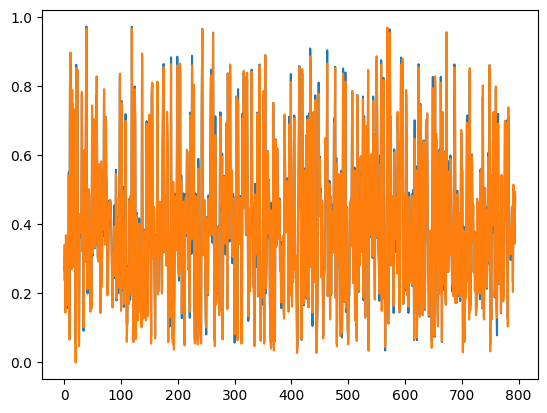

In [ ]:
plt.plot(train_results)

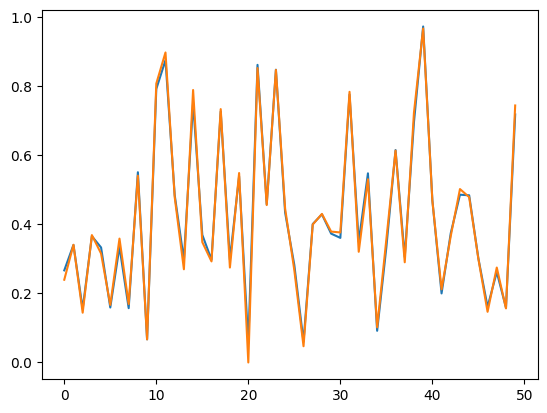

In [ ]:
plt.plot(train_results[0:50])